<a href="https://colab.research.google.com/github/RerarooM/TSF-GRIP/blob/main/TSF_GRIP_TASK1_PercentagePrediction_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TSF GRIP TASK1-PercentagePrediction-SimpleLinearRegression** 




**Predict the percentage of an student based on the no. of study hours.**

Using **Simple linear regression** involving just 2 variables.

Source Data: http://bit.ly/w-data 

Presented by: Muskaan Raj.


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
#loading data
print("Importing data...")
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Sucessfully imported.")

#to check weather data imported sucessfully or not.
df.head() #it will print 1st 5 datas from dataset.

Importing data...
Sucessfully imported.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape #to get no. of rows and column(rows,column)

(25, 2)

No. of rows = 25 (no. of **Hours** studied i.e. **Independent variable**.)

No. of columns = 2 (**Score** obtained i.e. **Dependent variable**.)

In [ ]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#description of data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visulisation:**

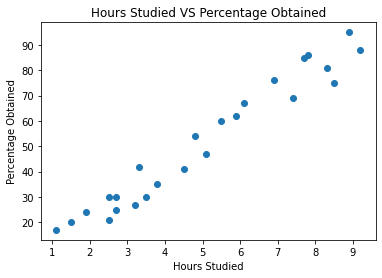

In [ ]:
#plotting graph
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.title('Hours Studied VS Percentage Obtained')
plt.show()

In [ ]:
#corelation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Data Training:**

In [ ]:
print("Training model...")
#taking input and output variable
x = df.iloc[:,[0]] #x needs to be in 2D array as sklearn expects the input to be in 2D
y = df.iloc[:,1]


#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#splitting data into 80:20


#fitting the model
model = LinearRegression() #creating instance
model.fit(x_train,y_train)

print("Model Trained.")

Training model...
Model Trained.


In [ ]:
#finding the coefficient and intercept
print("Slope(m) = ",model.coef_)
print("y-intercept(c) = ",model.intercept_)
line_eq = model.coef_*x+model.intercept_ #equation of line i.e.: y = mx + c


Slope(m) =  [9.91065648]
y-intercept(c) =  2.018160041434662


**Model Visulisation:**

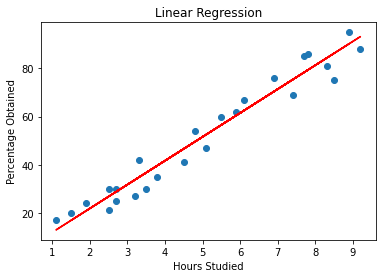

In [ ]:
#ploting the best fit line.
plt.scatter(df['Hours'],df['Scores'])
plt.plot(x,line_eq, c='r')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.title('Linear Regression')
plt.show()

In [ ]:
#training score
print("Score = ", model.score(x_train, y_train)*100)

Score =  95.15510725211553


**Prediction of output:**

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

#comparing actual and predicted data
df = pd.DataFrame({'Actual Data': y_test, 'Predicted Data' : y_pred, 'Error' : y_test-y_pred })
df

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


,Actual Data,Predicted Data,Error
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


**Evaluating the Model:**

In [ ]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("r2 Score: ",r2_score(y_test, y_pred))

Mean Squared Error:  21.598769307217456
Mean Absolute Error:  4.183859899002982
r2 Score:  0.9454906892105354


**QUESTION:**

**According to question, what will be the score of the student if he/she studies 9.25 hrs/day**

In [ ]:
score = model.predict([[9.25]])
print("Percentage scored by student on studing 9.25 hrs per day:",format(score[0]))

Percentage scored by student on studing 9.25 hrs per day: 93.69173248737539
